# Aim
To show how figures in this folder were generated

## Table Of Contents :
* [Generating Graphs](#first-bullet)
* [Optimizing Graphs](#second-bullet)
* [Computing Similarity](#third-bullet)
* [Metrics](#fourth-bullet)
* [Centers and Parity](#fifth-bullet)

In [3]:
# Imports 

import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt
import torch

2021-11-28 13:06:13,041- WARNING•	QuickBB solver is unavailable
2021-11-28 13:06:13,043- WARNING•	Tamaki solver is unavailable: No path /home/egupta/.local/lib/python3.7/site-packages/thirdparty/tamaki_treewidth


## Generating Graphs <a class="anchor" id="first-bullet"></a>

**Goal**: Generate 110 distinct 20-node random graphs, 10 for each parity (0,10,20, ..., 100 % even degree nodes). Degree of each node ranged from 1 to 6. 

**Notebook**: Create Graphs September 18.ipynb

*Note: I had already generated 22 such graphs (2 for each parity) using similar methods in another notebook in another folder. So in the notebook above, I generated only 88 graphs (8 for each parity)*

**Data Stored**: "New110Distinct20NodeRandomGraphs.txt"

**Methods** 
* Largely used Networkx (nx) library: first generate random degree sequence (my own function generate_deg_seq()) with specified parity AND second use nx.random_degree_sequence_graph() to generate the graph with specified degree sequence
* Details: Needed to make sure within each parity, all 10 graphs were isomorphic as well as connected
* Details: Graphs stored as adjacency matrices

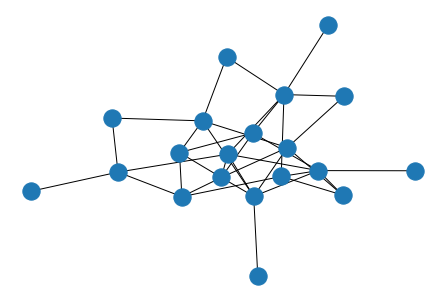

In [4]:
# How to use stored graphs

##first import
file = open("New110Distinct20NodeRandomGraphs.txt")
mat_list = np.loadtxt(file).reshape(110,20,20)

def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list

g_list = mats_to_graphs(mat_list)

## now call and draw those graphs
i = 75
nx.draw(g_list[i])

## Optimizing Graphs <a class="anchor" id="second-bullet"></a>

**Goal**: Find QAOA optimal parameters and energies for those generated graphs. 

**Notebook**: Optimize New Graphs(i) *for i = 1,2,...,6*

*Note: I had already optimized 22 such graphs (2 for each parity) using similar methods in another notebook in another folder. So in the notebook above, I optimized only 88 graphs (8 for each parity)*

*Note: Each graph took nearly 30 minutes to optimize. So to optimize all 110 graphs in less or (optimal hahah) time, I used paralleleization: optimized 15-20 graphs in one notebook, another 15-20 in another, etc. With this, I have 6 notebooks all titled 'Optimize New Graphs(i)'*

**Data Stored**: New110Distinct20NodeRandomGraphsData.txt

**Methods** 
* Largely used Qtensor: Optimized each graph 20 times (20 seeds) with max iteration set to 200 steps. All optimization runs had random initial parameters. Each run yielded 1 gamma parameter, 1 beta parameter 1 optimized energy, and 1 initial energy value.


In [10]:
# How to use stored graphs

##first import
file2 = open("New110Distinct20NodeRandomGraphsData.txt")
g_data = list(np.loadtxt(file2).reshape(110,20,4))

##Now call
i = 30
j = 19 #between 0 to 19 since only 20 seeds
g_data[i][j] # i'th graph, j'th seed or optimization run

array([ 0.09499374,  0.88048744, 18.08533964, 15.93582062])

In [11]:
# first value is gamma, second beta, third is optimized energy, 
#fourth is initial energy

## Computing Similarity <a class="anchor" id="third-bullet"></a>

**Goal**: Compute True/Actual Similarity or Transferability of Optimal QAOA parameters between all possible pairs of the 110 graphs in datatset

**Notebook**: Computing Similarity Metric T1 110 distinct Sep 19 ptX *for X = 1,2,...,6*

*Note: Computing similarity of each graph pair took non-trivial amount of time (I think 2 minutes). So to compute similarity of 110^2 graph pairs in less or  time, I used parallelization: computed transferability of 22x110 graphs in one notebook,  etc. With this, I have 6 notebooks all titled 'Computing Similarity Metric T1 110 distinct Sep 19 ptX'*

**Data Stored**: Similarity110DistinctSep19PtX.txt *for X = 1,2,...,6*

**Methods** 
* To compute tranferability or similarity between each graph pair, we need to compute approximation ratios of acceptor graph as a function of the 20 optimal parameters of donor. And then the average approx ratio is the transferability coefficient. 

* At the same time, I compute Similarity Metric 1 which is referred to in notebook as subgraph similarity metric. This metric is average transferability across donor subgraph - acceptor p = 1 subgraph pairs (in other words, we need to compute the transferability matrix--the blue heatmap). This was done in the folder Transferability Matrices/Tranferability_Matrix_Random_1_6_June_23.ipynb

* DEPRECATED: Mutual Similarity (or how subgraphs of a graph transfer amongst themselves)


In [13]:
#Using the data 

## first import it
datas = [[],[],[],[]]
for i in range(1,6,1):
    resi = []
    
    file = open('Similarity110DistinctSep19Pt'+str(i)+'.txt', 'r', newline = '')
    resi = (np.loadtxt(file).reshape(4,2420)).tolist()
    #print(len(resi))
    for j in range(4):
        for k in resi[j]:
            datas[j].append(float(k))
            
## then use it 
i = 100  #donor graph
j = 101  #acceptor graph
k = i*110 + j # index of the pair
for data in datas: 
    print(data[k])

0.9376697592793044
0.927057860979914
0.9827373835665554
0.938006097853941


The 4 numbers are: 
* Mutual Similarity of Donor
* Mutual Similarity of Acceptor
* True Similarity (or transferability)
* Similarity Metric 1 (subgraph similarity)

## Metrics <a class="anchor" id="fourth-bullet"></a>

### Similarity Metric 2 

**Goal**: Compute Similarity Metric 2 for all graph pairs.

**Notebook**: Newer Parity Metric Aug 30 Sep 23

**Data Stored**: N/A *No need to store data because simple, non time consuming computation*

**Methods** 
* Compute parity of even_percent() of a graph

* Use parity of graphs in each graph pair to compute similarity metric 2 (see paper for exact formula)

* Compare the metric computed against true similarity or transferability

* Do above comparison but also consider parity of graph pair (see yellow heatmaps). Each square is an average approx ratio over all 10x10 graph pairs with similar donor parity -acceptor parity



### Similarity Metric 3 

**Goal**: Compute Similarity Metric 3 for all graph pairs.

**Notebook**: New Parity Metric Sep 7 Sep 21

**Data Stored**: N/A *No need to store data because simple, non time consuming computation*

**Methods** 
* Compute parity of even_percent() of a graph

* Use parity of graphs in each graph pair to compute similarity metric 2 (see paper for exact formula)

* Compare the metric computed against true similarity or transferability

* Do above comparison but also consider parity of graph pair (see yellow heatmaps). Each square is an average approx ratio over all 10x10 graph pairs with similar donor parity -acceptor parity


## Centers and Parity <a class="anchor" id="fifth-bullet"></a>

**Goal**: Analyze distribution of optimal parameters of graphs (analysis work for similarity metric 3)

**Notebook**: Centers and Parity, Where are the centers Sep 21, Where are the Parameters

**Data Stored**: N/A *No need to store data because simple, non time consuming computation*

**Methods** 
* Plotting the obtained optimized parameters, observing clustering around 6 centers, computing approximation ratios at those 6 centers

For any questions/queries, reach out Eesh Gupta at eag4013@gmail.com or eesh.gupta@rutgers.edu